# Praca inżynierska

> Autor: Mateusz Woźniak


Projekt to model uczenia maszynowego, który rozpoznaje typ komórki na podstawie zdjęcia rozmazu szpiku kostnego.

Zbiór danych: https://www.kaggle.com/datasets/andrewmvd/bone-marrow-cell-classification/


In [2]:
import os
import matplotlib.pyplot as plt

names = {
    'ABE': 'Nieprawidłowy eozynofil',
    'ART': 'Artefakt',
    'BAS': 'Bazofil',
    'BLA': 'Blast',
    'EBO': 'Erytroblast',
    'EOS': 'Eozynofil',
    'FGC': 'Fagocyt',
    'HAC': 'Włochata komórka',
    'KSC': 'Cienie komórkowe',
    'LYI': 'Niedojrzały limfocyt',
    'LYT': 'Limfocyt',
    'MMZ': 'Metamielocyt',
    'MON': 'Monocyte',
    'MYB': 'Monocyt',
    'NGB': 'Krwinka biała pałeczkowata',
    'NGS': 'Segmentowany neutrofil',
    'NIF': 'Brak rozpoznania',
    'OTH': 'Inna komórka',
    'PEB': 'Proerytroblast',
    'PLM': 'Komórka plazmatyczna',
    'PMO': 'Promielocyt',
}
    

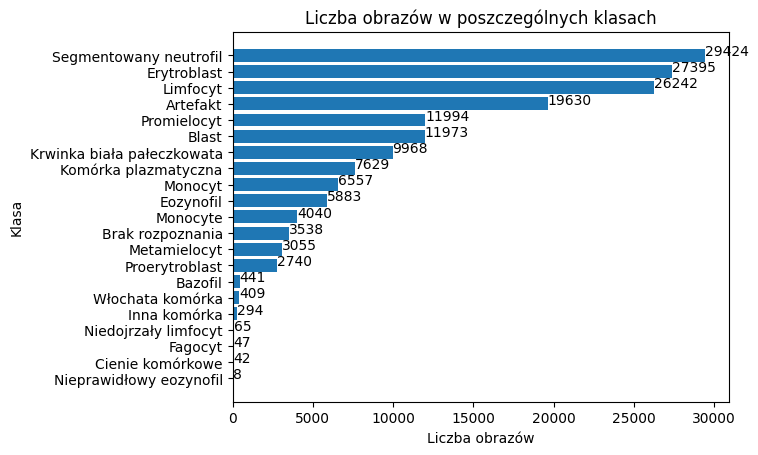

Nieprawidłowy eozynofil: 8
Cienie komórkowe: 42
Fagocyt: 47
Niedojrzały limfocyt: 65
Inna komórka: 294
Włochata komórka: 409
Bazofil: 441
Proerytroblast: 2740
Metamielocyt: 3055
Brak rozpoznania: 3538
Monocyte: 4040
Eozynofil: 5883
Monocyt: 6557
Komórka plazmatyczna: 7629
Krwinka biała pałeczkowata: 9968
Blast: 11973
Promielocyt: 11994
Artefakt: 19630
Limfocyt: 26242
Erytroblast: 27395
Segmentowany neutrofil: 29424


In [12]:
def count_images():
    cwd = os.getcwd()
    dataset_dir = os.path.join(cwd, "dataset")
    subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    counts = {}
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_dir, subdir)
        counts[subdir] = sum([len(files) for r, d, files in os.walk(subdir_path)])
        
    return counts

def plot_counts(counts):
    key_names = list(map(lambda x: names[x], counts.keys()))
    plt.barh(key_names, counts.values())
    for i in range(len(counts)):
        plt.text(list(counts.values())[i], i, str(list(counts.values())[i]))
    plt.title("Liczba obrazów w poszczególnych klasach")
    plt.xlabel("Liczba obrazów")
    plt.ylabel("Klasa")
    plt.show()

counts = count_images()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
plot_counts(counts)
for k, v in counts.items():
    print(f"{names[k]}: {v}")